In [3]:
from genetracks import Figure, Track, Alignment

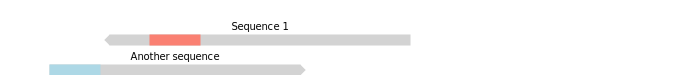

In [11]:
figure = Figure()
t1 = Track(50, 300, direction='f', label="Another sequence", regions=[(50, 100, 'lightblue')])
t2 = Track(110, 410, direction='r', label="Sequence 1", regions=[(150, 200, 'salmon')])
figure.add_track(t1)
figure.add_track(t2)
figure.show()

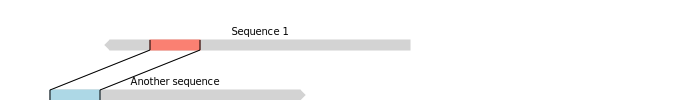

In [12]:
f = Figure(height=100)
f.add_alignment(Alignment(t1, t2, [(50, 150), (100, 200)]))
f.show()

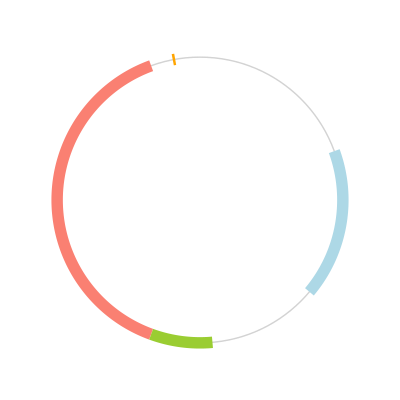

In [13]:
from genetracks import Plasmid, Region

p = Plasmid(360, regions=[Region(100, 101, color='orange'),
                          Region(110, 250, color='salmon'),
                          Region(250, 275, color='yellowgreen'),
                          Region(320, 20, color='lightblue')])
p.show()